<a href="https://colab.research.google.com/github/mohamed-stifi/PFA-Arabic-LLMs/blob/main/analyse%20articles_title%20topics_title%20paragraphs_title.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install arabic-reshaper
!pip install python-bidi

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from arabic_reshaper import reshape
import arabic_reshaper
from bidi.algorithm import get_display

In [ ]:
import json
path = '/content/drive/MyDrive/mowdoo3 _dataset/full_database.json'

# Load the article content from the JSON file
with open(path, "r", encoding="utf-8") as json_file:
    data = json.load(json_file)

In [ ]:
topics_dict = {}
articles_dict = {}
paragraphs_dict = {}
text_dict = {}

pattern = r'\s+|(?<!\d)[.:;?!~](?!\d)'

In [ ]:
for ind, topic in enumerate(data):
        topic_title , topic_articls = list(topic.items())[0]

        #  ---------------------------
        words = re.split(pattern, topic_title) #topic_title.split(' ')
        for word in words:
            if word in topics_dict:
                topics_dict[word] += 1
            else:
                topics_dict[word] = 1
        #  ---------------------------

        for article in topic_articls:
            article_title, article_paragraphs = list(article.items())[0]

            #  ---------------------------
            words =re.split(pattern, article_title) #article_title.split(' ')
            for word in words:
                if word in articles_dict:
                    articles_dict[word] += 1
                else:
                    articles_dict[word] = 1
            #  ---------------------------


            for paragraph in article_paragraphs:
                paragraph_title, paragraph_text = list(paragraph.items())[0]
                #  ---------------------------
                words = re.split(pattern, paragraph_title)       #paragraph_title.split(' ')
                for word in words:
                    if word in paragraphs_dict:
                        paragraphs_dict[word] += 1
                    else:
                        paragraphs_dict[word] = 1
                #  ---------------------------

                #  ---------------------------
                words = re.split(pattern, paragraph_text)        # paragraph_text.split(' ')
                for word in words:
                    if word in text_dict:
                        text_dict[word] += 1
                    else:
                        text_dict[word] = 1
                #  ---------------------------


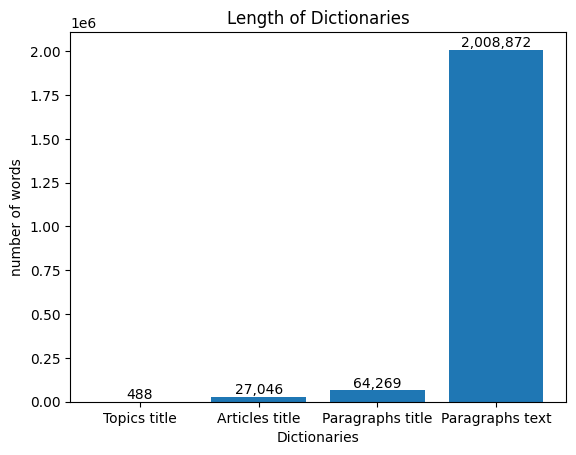

In [ ]:
lengths = {
    'Topics title': len(topics_dict),
    'Articles title': len(articles_dict),
    'Paragraphs title': len(paragraphs_dict),
    'Paragraphs text': len(text_dict)
}

fig, ax = plt.subplots()
bar_container = ax.bar(lengths.keys(), lengths.values())
ax.set(ylabel='number of words', xlabel = 'Dictionaries', title='Length of Dictionaries')
ax.bar_label(bar_container, fmt='{:,.0f}')

plt.show()

In [ ]:
topic_word_freq_df = pd.DataFrame.from_dict(topics_dict, orient='index', columns=['Frequency'])
topic_word_freq_df = topic_word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the frequencies
plt.figure(figsize=(10,6))

# Reshape Arabic text for proper display
topic_word_freq_df.index = [get_display(arabic_reshaper.reshape(word)) for word in topic_word_freq_df.index]

<Figure size 1000x600 with 0 Axes>

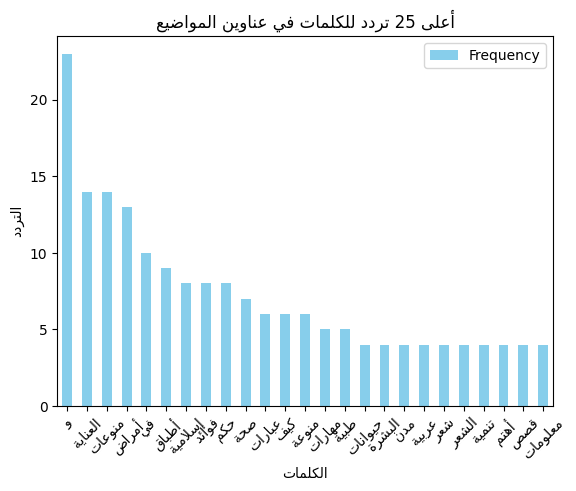

In [ ]:
# Plot top 20 word frequencies in a bar chart
topic_word_freq_df.head(25).plot(kind='bar', color='skyblue')
plt.title(get_display(arabic_reshaper.reshape('أعلى 25 تردد للكلمات في عناوين المواضيع')))
plt.xlabel(get_display(arabic_reshaper.reshape('الكلمات')))
plt.ylabel(get_display(arabic_reshaper.reshape('التردد')))
plt.xticks(rotation=45)
plt.show()

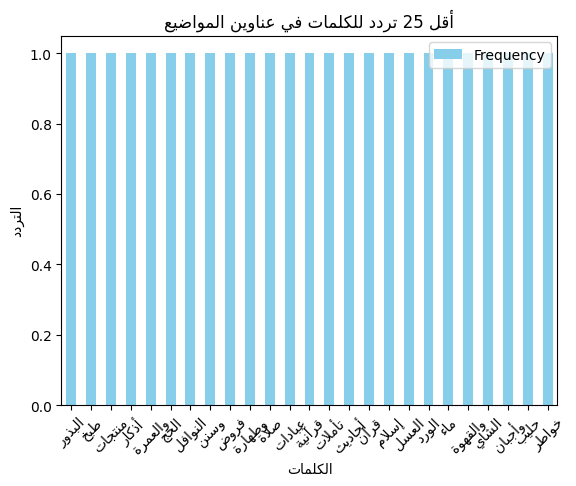

In [ ]:
# Plot bottom 20 word frequencies in a bar chart
topic_word_freq_df.tail(25).plot(kind='bar', color='skyblue')
plt.title(get_display(arabic_reshaper.reshape('أقل 25 تردد للكلمات في عناوين المواضيع')))
plt.xlabel(get_display(arabic_reshaper.reshape('الكلمات')))
plt.ylabel(get_display(arabic_reshaper.reshape('التردد')))
plt.xticks(rotation=45)
plt.show()

In [ ]:
article_word_freq_df = pd.DataFrame.from_dict(articles_dict, orient='index', columns=['Frequency'])
article_word_freq_df = article_word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the frequencies
plt.figure(figsize=(10,6))

# Reshape Arabic text for proper display
article_word_freq_df.index = [get_display(arabic_reshaper.reshape(word)) for word in article_word_freq_df.index]

<Figure size 1000x600 with 0 Axes>

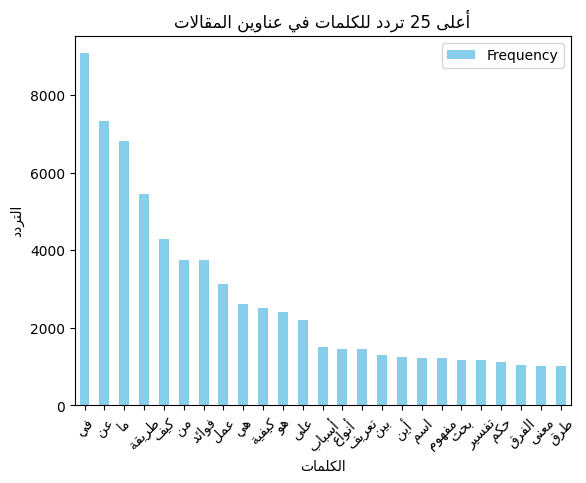

In [ ]:
# Plot top 20 word frequencies in a bar chart
article_word_freq_df.head(25).plot(kind='bar', color='skyblue')
plt.title(get_display(arabic_reshaper.reshape('أعلى 25 تردد للكلمات في عناوين المقالات')))
plt.xlabel(get_display(arabic_reshaper.reshape('الكلمات')))
plt.ylabel(get_display(arabic_reshaper.reshape('التردد')))
plt.xticks(rotation=45)
plt.show()

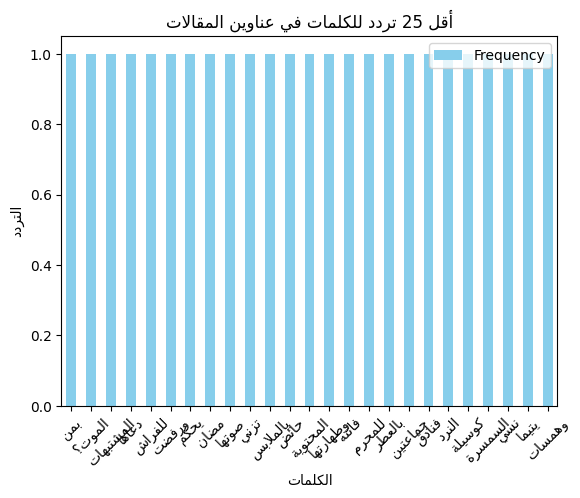

In [ ]:
# Plot bottom 20 word frequencies in a bar chart
article_word_freq_df.tail(25).plot(kind='bar', color='skyblue')
plt.title(get_display(arabic_reshaper.reshape('أقل 25 تردد للكلمات في عناوين المقالات')))
plt.xlabel(get_display(arabic_reshaper.reshape('الكلمات')))
plt.ylabel(get_display(arabic_reshaper.reshape('التردد')))
plt.xticks(rotation=45)
plt.show()

In [ ]:
paragraph_word_freq_df = pd.DataFrame.from_dict(paragraphs_dict, orient='index', columns=['Frequency'])
paragraph_word_freq_df = paragraph_word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the frequencies
plt.figure(figsize=(10,6))

# Reshape Arabic text for proper display
paragraph_word_freq_df.index = [get_display(arabic_reshaper.reshape(word)) for word in paragraph_word_freq_df.index]

<Figure size 1000x600 with 0 Axes>

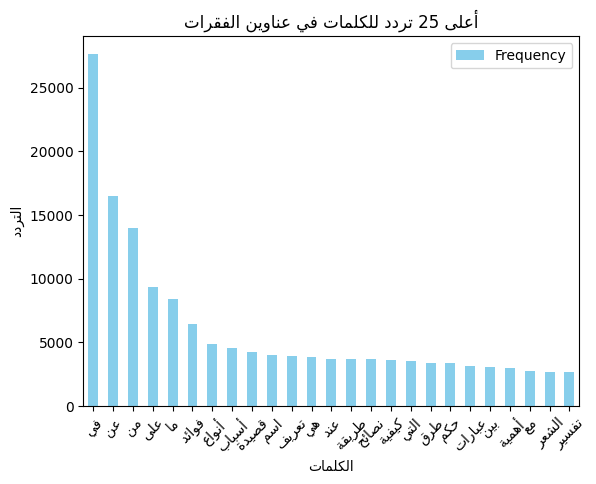

In [ ]:
# Plot top 20 word frequencies in a bar chart
paragraph_word_freq_df.head(25).plot(kind='bar', color='skyblue')
plt.title(get_display(arabic_reshaper.reshape('أعلى 25 تردد للكلمات في عناوين الفقرات')))
plt.xlabel(get_display(arabic_reshaper.reshape('الكلمات')))
plt.ylabel(get_display(arabic_reshaper.reshape('التردد')))
plt.xticks(rotation=45)
plt.show()

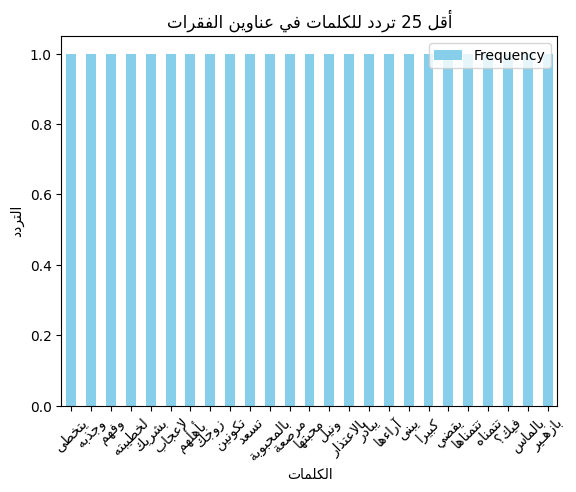

In [ ]:
# Plot bottom 20 word frequencies in a bar chart
paragraph_word_freq_df.tail(25).plot(kind='bar', color='skyblue')
plt.title(get_display(arabic_reshaper.reshape('أقل 25 تردد للكلمات في عناوين الفقرات')))
plt.xlabel(get_display(arabic_reshaper.reshape('الكلمات')))
plt.ylabel(get_display(arabic_reshaper.reshape('التردد')))
plt.xticks(rotation=45)
plt.show()

In [ ]:
text_word_freq_df = pd.DataFrame.from_dict(text_dict, orient='index', columns=['Frequency'])
text_word_freq_df = text_word_freq_df.sort_values(by='Frequency', ascending=False)


In [ ]:
head_text_word_freq_df = text_word_freq_df[:1090]
head_text_word_freq_df.index = [get_display(arabic_reshaper.reshape(word)) for word in head_text_word_freq_df.index]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


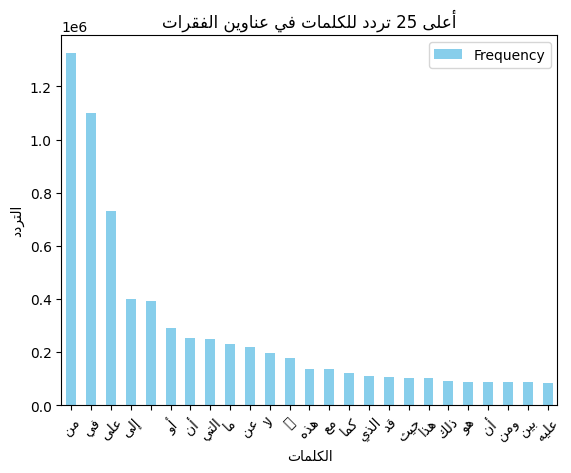

In [ ]:
# Plot top 20 word frequencies in a bar chart
head_text_word_freq_df.head(25).plot(kind='bar', color='skyblue')
plt.title(get_display(arabic_reshaper.reshape('أعلى 25 تردد للكلمات في عناوين الفقرات')))
plt.xlabel(get_display(arabic_reshaper.reshape('الكلمات')))
plt.ylabel(get_display(arabic_reshaper.reshape('التردد')))
plt.xticks(rotation=45)
plt.show()

In [ ]:
tail_text_word_freq_df = text_word_freq_df[-1000:]
tail_text_word_freq_df.index = [get_display(arabic_reshaper.reshape(word)) for word in tail_text_word_freq_df.index]

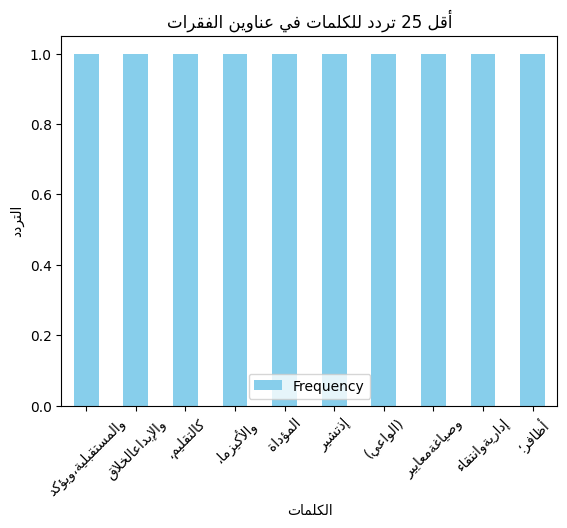

In [ ]:
# Plot bottom 20 word frequencies in a bar chart
tail_text_word_freq_df.head(10).plot(kind='bar', color='skyblue')
plt.title(get_display(arabic_reshaper.reshape('أقل 25 تردد للكلمات في عناوين الفقرات')))
plt.xlabel(get_display(arabic_reshaper.reshape('الكلمات')))
plt.ylabel(get_display(arabic_reshaper.reshape('التردد')))
plt.xticks(rotation=45)
plt.show()

In [ ]:
text_word_freq_1 = text_word_freq_df[text_word_freq_df['Frequency']==1]

In [ ]:
print(f'the number of word with ferquency == 1 is {len(text_word_freq_1)} that is {len(text_word_freq_1)/len(text_word_freq_df)} of total words of ptext.')

the number of word with ferquency == 1 is 1016672 that is 0.5060909804108973 of total words of ptext.


In [ ]:
text_word_freq_df['word_length'] = text_word_freq_df.index.map(len)
text_word_freq_df = text_word_freq_df.sort_values(by='word_length')

In [ ]:
text_word_len_great_10 = text_word_freq_df[text_word_freq_df['word_length'] >=10]
text_word_len_great_10['Frequency'].unique()

array([    1,     2,     4,    11,    12,    13,    10,    16,     3,
          15,    17,    18,     7,    14,     6,     8,     5,     9,
          34,    33,    36,    35,    31,    32,    41,    42,    40,
          44,    45,    43,    37,    38,    39,    25,    26,    27,
          23,    24,    29,    30,    28,   119,   120,   118,   117,
         121,   124,   123,   125,   122,   112,   111,   113,   110,
         116,   115,   114,   136,   135,   137,   134,   141,   142,
         140,   139,   138,   128,   127,   126,   132,   131,   133,
         129,   130,    91,    90,    89,    94,    93,    95,    92,
          86,    85,    87,    88,   105,   104,   103,   102,   106,
         109,   108,   107,    97,    98,    96,   100,    99,   354,
         352,   356,   349,   340,   338,   337,   367,   366,   363,
         329,   316,   317,   327,   326,   321,   320,   319,   314,
         405,   404,   400,   393,   398,   409,   429,   421,   414,
         368,   370,

In [ ]:
text_word_len_great_10['word_length'].unique()

array([  10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
         21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
         32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
         43,   44,   45,   46,   47,   48,   49,   50,   51,   52,   53,
         54,   55,   56,   57,   58,   59,   60,   61,   62,   63,   64,
         65,   66,   67,   68,   69,   70,   71,   72,   73,   74,   75,
         76,   77,   78,   79,   80,   81,   82,   83,   84,   85,   86,
         87,   88,   89,   90,   91,   92,   93,   94,   95,   96,   97,
         98,   99,  100,  101,  102,  103,  104,  105,  106,  107,  108,
        109,  110,  111,  112,  113,  114,  115,  116,  117,  118,  119,
        120,  121,  122,  123,  124,  125,  126,  127,  128,  129,  130,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  146,  148,  150,  152,  153,  155,  156,  157,  159,  161,
        162,  164,  165,  166,  169,  170,  174,  1

In [ ]:
text_word_len_great_10[text_word_len_great_10['Frequency'] < 200 ]

,Frequency,word_length
Billboard،,1,10
وفَضْلهما،,1,10
توقفالدورة,1,10
الصوداالتي,1,10
[٢]الصياغة,1,10
...,...,...
الأنعامالأعرافيونسهوديوسفإبراهيمالحجرالنحلالإسراءالكهفمريمطهالأنبياءالحجالمؤمنونالفرقانالشعراءالنملالقصصالعنكبوتالروملقمانالسجدةسبأفاطريسالصافاتصالزمرغافرفصلتالشورىالزخرفالدخانالجاثيةالأحقافقالذارياتالطورالنجمالقمرالواقعةالملكالقلمالحاقةالمعارجنوحالجنالمزملالمدثرالقيامةالإنسانالمرسلاتالنبأالنازعاتعبسالتكويرالانفطارالانشقاقالبروجالطارقالأعلىالغاشيةالفجرالبلدالشمسالليلالضحىالشرحالتينالعلقالعادياتالقارعةالتكاثرالعصرالهُمزةالفيلقريشالماعونالكوثرالكافرونالمسد--,2,460
مدنيةالفرقان2577مكيةفاطر3545مكيةمريم1998مكيةطه20135مكيةالواقعة5696مكيةالشعراء26227مكيةالنمل2793مكيةالقصص2888مكيةالإسراء17111مكيةيونس10109مكيةهود11128مكيةيوسف12111مكيةالحجر1599مكيةالأنعام6156مكيةالصافات37182مكيةلقمان3234مكيةسبأ3454مكيةالزمر3975مكيةغافر4085مكيةفصلت4154مكيةالشورى4253مكيةالزخرف4389مكيةالدخان4459مكيةالجاثية4537مكيةالأحقاف4635مكيةالذاريات5160مكيةالغاشية8862مكيةالكهف18110مكيةالنحل16128مكيةنوح7128مكيةإبراهيم1452مكيةالأنبياء21112مكيةالمؤمنون23118مكيةالسجدة3230مكيةالطور5249مكيةالملك6730مكيةالحاقة6952مكيةالمعارج7044مكيةالنبأ7840مكيةالنازعات7946مكيةالإنفطار8219مكيةالانشقاق8425مكيةالروم3060مكيةالعنكبوت2969مكيةالمطففين8336مكيةالبقرة2286مدنيةالأنفال875مدنيةآل,2,669
العنصرالهيدروجين(H)الهيليوم(He)الليثيوم(Li)البريليوم(Be)البورون(B)الكربون(C)النيتروجين(N)الأكسجين(O)الفلورين(F)نيون(Ne)الصوديوم(Na)المغنيسيوم(Mg)الألمنيوم(Al)السيليكون(Si)الفوسفور(P)الكلور(Cl)الكبريت(S)أرغون(Ar)البوتاسيوم(K)الكالسيوم(Ca)سكاندوم(Sc)التيتانيوم(Ti)الفاناديوم(V)الكروم(Cr)المنغنيز(Mn)الحديد(Fe)كوبالت(Co)نيكل(Ni)النحاس(Cu)الزنك(Zn)الجاليوم(Ga)جيرمانيوم(Ge)الزرنيخ(As)سيلينيوم(Se)البروم(Br)الكريبتون(Kr)الروبيديوم(Rb)سترونشيوم(Sr)إتريوم(Y)زركونيوم(Zr)النيوبيوم(Nb)موليبدنوم(Mo)تكنيشيوم(Tc)الروثينيوم(Ru)الروديوم(Rh)بالاديوم(Pd)الفضة(Ag)كادميوم(Cd)الإنديوم(In)القصدير(Sn)إثمد(Sb)تيلوريوم(Te)يود(I)زينون(Xe)سيزيوم(Cs)لانثانوم(Ba)سيريوم(La)براسوديميوم(Ce)براسوديميوم(Pr)نيوديميوم(Nd)بروميثيوم(Pm)ساماريوم(Sm)يوروبيوم(Eu)جادولينيوم(Gd)تيربيوم(Tb)ديسبروسيوم(Dy)هولميوم(Ho)إربيوم(Er)توليوم(Tm)إتيربيوم(Yb)لوتيشيوم(Lu)هافنيوم(Hf)تانتالوم(Ta)تنجستن(W)رينيوم(Re)أوزميوم(Os)إريديوم(Ir)بلاتين(Pt)ذهب(Au)الزئبق(Hg)ثاليوم(Ti)رصاص(Pb)بزموت(Bi)بولونيوم(Po)أستاتين(At)راديون(Rn)فرانسيوم(Fr)راديوم(Ra)أكتينيوم(Ac)ثوريوم(Th)بروتكتينيوم(Pa)يورانيوم(U)نبتونيوم(Np)بلوتونيوم(Pu)أمريسيوم(Am)كوريوم(Cm)بركيليوم(Bk)كاليفورنيوم(Cf)أينشتاينيوم(Es)فرميوم(Fm)مندليفيوم(Md)نوبليوم(No)لورنسيوم(Lr)رذرفورديوم(Rf)دوبنيوم(Db)سيبورغيوم(Sg)بوريوم(Bh)هاسيوم(Hs)مايتنريوم(Mt)رونتيجينيوم(Rg)كوبرنيسيوم(Cn)أنون,2,1283
الذريّالهيدروجينH1الهيليومHe2الليثيومLi3البيريليومBe4البورونB5الكربونC6النيتروجينN7الأكسجينO8الفلورF9النيونNe10الصوديومNa11المغنسيومMg12الألومنيومAl13السيليكونSi14الفوسفورP15الكبريتS16الكلورCl17الأرغونAr18البوتاسيومK19الكالسيومCa20السكانديومSc21التيتانيومTi22الفاناديومV23الكرومCr24المنغنيزMn25الحديدFe26الكوبالتCo27النيكلNi28النحاسCu29الزنكZn30الغاليومGa31الجرمانيومGe32الزرنيخAs33السيلينيومSe34البرومBr35الكريبتونKr36الروبيديومRb37السترونشيومSr38الإتريومY39الزركونيومZr40النيوبيومNb41الموليبدنومMo42التكنيشيومTc43الروثينيومRu44الروديومRh45البالاديومPd46الفضةAg47الكادميومCd48الإنديومIn49القصديرSn50الإثمدSb51التيلوريومTe52اليودI53الزينونXe54السيزيومCs55الباريومBa56اللانثانومLa57السيريومCe58البراسيوديميومPr59النيوديميومNd60البروميثيومPm61الساماريومSm62اليوروبيومEu63الغادولينيومGd64التيربيومTb65الديسبروسيومDy66الهولميومHo67الإربيومEr68الثوليومTm69الإتيربيومYb70اللوتيتيومLu71الهافنيومHf72التانتالومTa73التنغستنW74الرينيومRe75الأوزميومOs76الإريديومIr77البلاتينPt78الذهبAu79الزئبقHg80الثاليومTl81الرصاصPb82البزموتBi83البولونيومPo84الأستاتينAt85الرادونRn86الفرانسيومFr87الراديومRa88الأكتينيومAc89الثوريومTh90البروتكتينيومPa91اليورانيومU92النبتونيومNp93البلوتونيومPu94الأمريكيومAm95الكوريومCm96البركليومBk97الكاليفورنيومCf98الأينشتاينيومEs99الفرميومFm100المندليفيومMd101النوبليومNo102اللورنسيومLr103الرذرفورديومRf104الدوبنيومDb105السيبورجيومSg106البوريومBh107الهاسيومHs108المايتنريومMt109الدارمشتاتيومDs110الرونتجينيومRg111الكوبرنيسيومCn112النيهونيومN